TensorFlow завантажено успішно

--- 3.1. Генерація Даних для Регресії ---
Регресія: X_train (форма): (20,), y_train (форма): (20,)

--- 3.2. Генерація Даних для Класифікації ---
Класифікація: X_train (форма): (240, 2), y_train (форма): (240,)

--- 4. Графічний аналіз ---


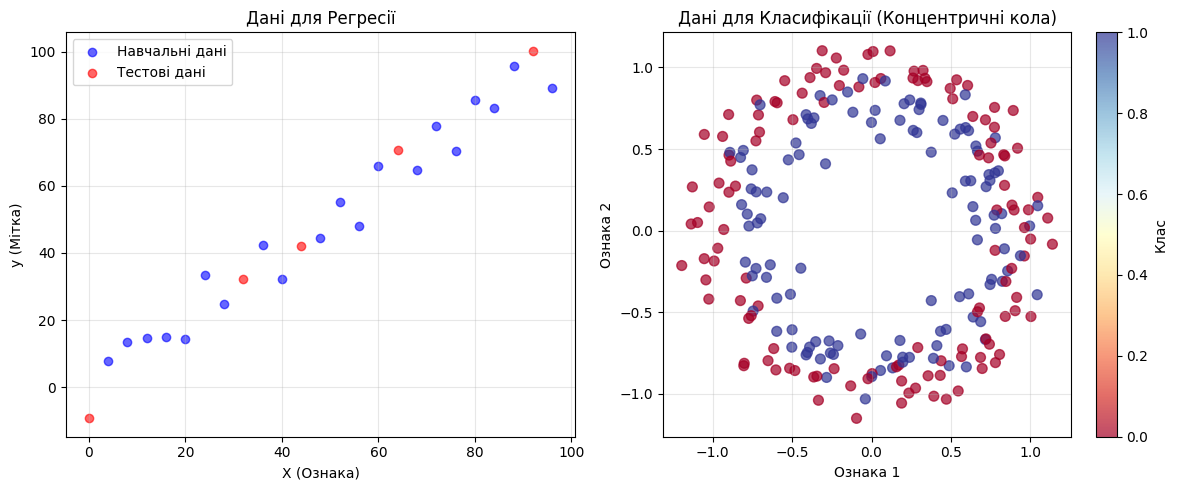

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Спробуємо імпортувати TensorFlow
try:
    import tensorflow as tf
    print("TensorFlow завантажено успішно")
    USE_TF = True
except ImportError:
    print("TensorFlow не доступний, використовуємо NumPy")
    USE_TF = False

# 3.1. Генеруємо дані для РЕГРЕСІЇ
print("\n--- 3.1. Генерація Даних для Регресії ---")

if USE_TF:
    # Генеруємо лінійні дані з шумом використовуючи TensorFlow
    X = tf.cast(tf.range(0, 100, 4), tf.float32)
    y = X + tf.random.uniform(shape=[X.shape[0]], minval=-10, maxval=10, dtype=tf.float32)
    
    # Розділення на навчальний та тестовий набори
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X.numpy(), y.numpy(), test_size=0.2, random_state=42
    )
else:
    # Альтернатива з NumPy
    np.random.seed(42)
    X = np.arange(0, 100, 4, dtype=np.float32)
    y = X + np.random.uniform(-10, 10, size=X.shape[0]).astype(np.float32)
    
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

print(f"Регресія: X_train (форма): {X_train_reg.shape}, y_train (форма): {y_train_reg.shape}")

# 3.2. Генеруємо дані для КЛАСИФІКАЦІЇ
print("\n--- 3.2. Генерація Даних для Класифікації ---")

if USE_TF:
    # Генеруємо дані для класифікації (два концентричні кола)
    X_cls, y_cls = make_circles(n_samples=300, noise=0.1, random_state=42)
    X_cls = tf.cast(X_cls, tf.float32)
    y_cls = tf.cast(y_cls, tf.int32)
else:
    # Без TensorFlow
    X_cls, y_cls = make_circles(n_samples=300, noise=0.1, random_state=42)
    X_cls = X_cls.astype(np.float32)
    y_cls = y_cls.astype(np.int32)

# Розділення на навчальний та тестовий набори
if USE_TF:
    X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
        X_cls.numpy(), y_cls.numpy(), test_size=0.2, random_state=42
    )
else:
    X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
        X_cls, y_cls, test_size=0.2, random_state=42
    )

print(f"Класифікація: X_train (форма): {X_train_cls.shape}, y_train (форма): {y_train_cls.shape}")

# 4. Графічний аналіз за допомогою Matplotlib
print("\n--- 4. Графічний аналіз ---")
plt.figure(figsize=(12, 5))

# 4.1. Візуалізація даних для Регресії
plt.subplot(1, 2, 1)
plt.scatter(X_train_reg, y_train_reg, c='b', label='Навчальні дані', alpha=0.6)
plt.scatter(X_test_reg, y_test_reg, c='r', label='Тестові дані', alpha=0.6)
plt.title("Дані для Регресії")
plt.xlabel("X (Ознака)")
plt.ylabel("y (Мітка)")
plt.legend()
plt.grid(True, alpha=0.3)

# 4.2. Візуалізація даних для Класифікації
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_train_cls[:, 0], X_train_cls[:, 1], c=y_train_cls, cmap=plt.cm.RdYlBu, s=50, alpha=0.7)
plt.title("Дані для Класифікації (Концентричні кола)")
plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.colorbar(scatter, label='Клас')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()